In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install difflib


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement difflib (from versions: none)
ERROR: No matching distribution found for difflib


In [10]:
import difflib

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_17392\1585892131.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Data collection and preprocessing

In [13]:
df=pd.read_csv(r"C:\Users\ROHAN\Documents\Datascience\Movie recommendation\movies.csv")
df.head()

index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel secret agent sequel mi6                en   
3  dc comics crime fighter terrorist secret ident...                en   
4  based on novel mars medallion space travel pri...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  ... runtime  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577  ...   162.0   
1  Captain Barbossa, long believed to be dead, ha...  139.082615  ...   169.0   
2  A cryptic message from Bond’s past sends him o...  107.376788  ...   148.0   
3  Following the death of District Attorney Harve...  112.312950  ...   165.0   
4  John Carter is a war-weary, former military ca...   43.926995  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                                cast  \
0  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1  Johnny Depp Orlando Bloom Keira Knightley Stel...   
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...   
3  Christian Bale Michael Caine Gary Oldman Anne ...   
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...   

                                                crew           director  
0  [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...      James Cameron  
1  [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...     Gore Verbinski  
2  [{'name': 'Thomas Newman', 'gender': 2, 'depar...         Sam Mendes  
3  [{'name': 'Hans Zimmer', 'gender': 2, 'departm...  Christopher Nolan  
4  [{'name': 'Andrew Stanton', 'gender': 2, 'depa...     Andrew Stanton  

[5 rows x 24 columns]

In [14]:
df.shape

(4803, 24)

In [15]:
df.describe

<bound method NDFrame.describe of       index     budget                                    genres  \
0         0  237000000  Action Adventure Fantasy Science Fiction   
1         1  300000000                  Adventure Fantasy Action   
2         2  245000000                    Action Adventure Crime   
3         3  250000000               Action Crime Drama Thriller   
4         4  260000000          Action Adventure Science Fiction   
...     ...        ...                                       ...   
4798   4798     220000                     Action Crime Thriller   
4799   4799       9000                            Comedy Romance   
4800   4800          0             Comedy Drama Romance TV Movie   
4801   4801          0                                       NaN   
4802   4802          0                               Documentary   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http

In [16]:
features=['genres','original_title', 'keywords','cast','director']
print(features)

['genres', 'original_title', 'keywords', 'cast', 'director']


In [17]:
df.isnull()

index  budget  genres  homepage     id  keywords  original_language  \
0     False   False   False     False  False     False              False   
1     False   False   False     False  False     False              False   
2     False   False   False     False  False     False              False   
3     False   False   False     False  False     False              False   
4     False   False   False     False  False     False              False   
...     ...     ...     ...       ...    ...       ...                ...   
4798  False   False   False      True  False     False              False   
4799  False   False   False      True  False      True              False   
4800  False   False   False     False  False     False              False   
4801  False   False    True     False  False      True              False   
4802  False   False   False      True  False     False              False   

      original_title  overview  popularity  ...  runtime  spoken_languages  \
0              False     False       False  ...    False             False   
1              False     False       False  ...    False             False   
2              False     False       False  ...    False             False   
3              False     False       False  ...    False             False   
4              False     False       False  ...    False             False   
...              ...       ...         ...  ...      ...               ...   
4798           False     False       False  ...    False             False   
4799           False     False       False  ...    False             False   
4800           False     False       False  ...    False             False   
4801           False     False       False  ...    False             False   
4802           False     False       False  ...    False             False   

      status  tagline  title  vote_average  vote_count   cast   crew  director  
0      False    False  False         False       False  False  False     False  
1      False    False  False         False       False  False  False     False  
2      False    False  False         False       False  False  False     False  
3      False    False  False         False       False  False  False     False  
4      False    False  False         False       False  False  False     False  
...      ...      ...    ...           ...         ...    ...    ...       ...  
4798   False    False  False         False       False  False  False     False  
4799   False    False  False         False       False  False  False     False  
4800   False     True  False         False       False  False  False     False  
4801   False    False  False         False       False  False  False     False  
4802   False     True  False         False       False  False  False     False  

[4803 rows x 24 columns]

# Handling missing values

In [18]:
for feature in features:
    df[feature]=df[feature].fillna('')

In [19]:
all_features=df['genres']+''+df['original_title']+''+df['keywords']+''+df['cast']+''+df['director']

In [20]:
#for using cosine si"milarity all the data must be in numerical values that's why we converting the data
vectorizer=TfidfVectorizer()

In [21]:
feature_vectors=vectorizer.fit_transform(all_features)   #this will transform all the data into numerical form
feature_vectors

<4803x29363 sparse matrix of type '<class 'numpy.float64'>'
	with 92877 stored elements in Compressed Sparse Row format>

**finding similarities using cosine similarity**

In [22]:
print(feature_vectors)

  (0, 3772)	0.18398666175095232
  (0, 21983)	0.2882890492345268
  (0, 17638)	0.16763441037166155
  (0, 15410)	0.23546797516383433
  (0, 24691)	0.1745450573619989
  (0, 28226)	0.20673546012545788
  (0, 23859)	0.2268572905640284
  (0, 22859)	0.2268572905640284
  (0, 29278)	0.20959113685175745
  (0, 28892)	0.2471738965214681
  (0, 24182)	0.2882890492345268
  (0, 4901)	0.2582167735383399
  (0, 27982)	0.14097389508642696
  (0, 24324)	0.36146908016593565
  (0, 10774)	0.19530418119563914
  (0, 4673)	0.232339935226263
  (0, 9798)	0.2882890492345268
  (0, 23212)	0.10497942023004349
  (0, 9468)	0.12450515469934056
  (0, 492)	0.09693728174330202
  (0, 302)	0.08282086208326321
  (1, 27628)	0.19832756850939515
  (1, 9619)	0.23549291203313666
  (1, 29148)	0.18745740236549083
  (1, 4515)	0.19234528439117893
  :	:
  (4801, 3736)	0.3237652328298093
  (4801, 23551)	0.2982170199445933
  (4801, 29248)	0.3088204863315169
  (4801, 8677)	0.2683275269480086
  (4801, 799)	0.20029352989709426
  (4801, 12462)	0.

In [23]:
similarity=cosine_similarity(feature_vectors)
similarity

array([[1.        , 0.02033858, 0.01741978, ..., 0.        , 0.        ,
        0.        ],
       [0.02033858, 1.        , 0.00822539, ..., 0.04177788, 0.        ,
        0.        ],
       [0.01741978, 0.00822539, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04177788, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [24]:
similarity.shape     #this shape represents each compares with all the other movies

(4803, 4803)

In [25]:
movies_list=df['original_title'].tolist()
movies_list

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [26]:
#finding the similarities 
movie_name=input("enter a movie:")
find_sim=difflib.get_close_matches(movie_name,movies_list)
find_sim


enter a movie: pink panther


['The Pink Panther', 'Up in the Air', 'Open Water']

In [27]:
most_sim=find_sim[0]
most_sim


'The Pink Panther'

In [28]:
#finding the index of the movie in the dataset
movie_index=df[df.original_title==most_sim]['index'].values[0]
movie_index

453

In [31]:
#finding list of similar movies based on similarity score
sim_score=list(enumerate(similarity[movie_index]))
sim_score

[(0, 0.007109421250107956),
 (1, 0.0),
 (2, 0.007618327275213176),
 (3, 0.03320515803108945),
 (4, 0.006951204688043602),
 (5, 0.006886005101062051),
 (6, 0.0),
 (7, 0.006742533325265171),
 (8, 0.0),
 (9, 0.006473601161608235),
 (10, 0.0323042682289402),
 (11, 0.006833676292562647),
 (12, 0.0),
 (13, 0.006710304460944522),
 (14, 0.031542852495952886),
 (15, 0.0),
 (16, 0.006793003621891186),
 (17, 0.028963080036082473),
 (18, 0.012232550483291011),
 (19, 0.031812540233451855),
 (20, 0.006503556044690792),
 (21, 0.00683962780773478),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.007010348109897147),
 (27, 0.006585502487703699),
 (28, 0.00667525518760292),
 (29, 0.045978562002408935),
 (30, 0.006791074039434817),
 (31, 0.00692367578561637),
 (32, 0.0),
 (33, 0.006486390239123157),
 (34, 0.0),
 (35, 0.007031072952270523),
 (36, 0.006777161976185415),
 (37, 0.0),
 (38, 0.00657268763843519),
 (39, 0.006843929789588573),
 (40, 0.04036209829313463),
 (41, 0.007072870974423556),
 (42

In [32]:
df['original_title'][3458]

'Duel in the Sun'

In [33]:
#sorting the movies based on the similarity score
sort_sim=sorted(sim_score, key=lambda x:x[1], reverse=True)
sort_sim

[(453, 1.0000000000000002),
 (2866, 0.21466241645184672),
 (3565, 0.19051565367091666),
 (526, 0.1730640358167176),
 (673, 0.17195355939782253),
 (1417, 0.12663189624616542),
 (324, 0.11098454316857646),
 (773, 0.11078011088557671),
 (4018, 0.1101521555964049),
 (840, 0.10667804835147471),
 (2090, 0.10427727474772537),
 (288, 0.10360618733495178),
 (4526, 0.10185770236565149),
 (142, 0.09794507182134571),
 (1752, 0.09667349306163461),
 (1795, 0.09631979058035624),
 (2263, 0.09509350721868597),
 (1915, 0.09237605828608433),
 (2892, 0.09087078584722416),
 (3851, 0.09042465416698009),
 (497, 0.09029275725975615),
 (4165, 0.08925845352640545),
 (2738, 0.08376979862682177),
 (3991, 0.08367317996887186),
 (3537, 0.0818624272812417),
 (4503, 0.08086097082352388),
 (70, 0.08021528288596112),
 (439, 0.07943159962822009),
 (205, 0.07934145240179724),
 (1274, 0.07904329469530423),
 (173, 0.07837059058662196),
 (2599, 0.07764784098445966),
 (993, 0.07669258580632256),
 (3917, 0.07453670422307697),

In [34]:
print("Movies recommended for you to watch:")
i=1
for movie in sort_sim:
    index=movie[0]
    title=df[df.index==index]['original_title'].values[0]
    if(i<=10):
        print(i,'.',title)
        i=i+1
    else:
        break

Movies recommended for you to watch:
1 . The Pink Panther
2 . Cadillac Records
3 . The Return of the Pink Panther
4 . Dreamgirls
5 . Austin Powers in Goldmember
6 . Alex Cross
7 . The Road to El Dorado
8 . Flyboys
9 . Sur le seuil
10 . Ronin


In [36]:
movies_list=df['original_title'].tolist()
movie_name=input("enter a movie:")
find_sim=difflib.get_close_matches(movie_name,movies_list)
most_sim=find_sim[0]
movie_index=df[df.original_title==most_sim]['index'].values[0]
sim_score=list(enumerate(similarity[movie_index]))
sort_sim=sorted(sim_score, key=lambda x:x[1], reverse=True)
print("Movies recommended for you to watch:")
i=1
for movie in sort_sim:
    index=movie[0]
    title=df[df.index==index]['original_title'].values[0]
    if(i<=10):
        print(i,'.',title)
        i=i+1
    else:
        break

enter a movie: iron man


Movies recommended for you to watch:
1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . The Avengers
5 . Captain America: Civil War
6 . X2
7 . Avengers: Age of Ultron
8 . Made
9 . X-Men: The Last Stand
10 . X-Men


# Building a dashboard

In [37]:
pip install pandas dash

In [35]:
pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\http\client.py", line 466, in read
    s = self.fp.read

In [31]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install dash


  Using cached dash-2.15.0-py3-none-any.whl.metadata (11 kB)
  Using cached flask-3.0.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
  Using cached importlib_metadata-7.0.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached blinker-1.7.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached zipp-3.17.0-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   -----------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\http\client.py", line 466, in read
    s = self.fp.read

In [38]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_17392\488439558.py:2: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_17392\488439558.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [39]:
app=dash.Dash(__name__)
app.layout=html.Div(children=[html.H1("Movie Recommended System", style={'text-align':'center','color':'violet','font-size':40}),
                             html.Div([
                             html.Label("Enter a Movie Title:"),
                             dcc.Input(id='input-movie', type='text', value='Avatar'),
                                ]),
                            html.Br(),
                            html.Div(id='output-similar-movies')
                            ])

@app.callback(Output(component_id='output-similar-movies', component_property='children'),
              Input(component_id='input-movie', component_property='value'))

def similar_movies():
    movies_list=df['original_title'].tolist()
    movie_name=input("enter a movie:")

    find_sim=difflib.get_close_matches(movie_name,movies_list)
    most_sim=find_sim[0]
    movie_index=df[df.original_title==most_sim]['index'].values[0]
    sim_score=list(enumerate(similarity[movie_index]))
    sort_sim=sorted(sim_score, key=lambda x:x[1], reverse=True)
    print("Movies recommended for you to watch:")
    i=1
    for movie in sort_sim:
        index=movie[0]
        title=df[df.index==index]['original_title'].values[0]
        similar_movies_list=(html.Li(title))
        if(i<=10):
            print(i,'.',title)
            i=i+1
        else:
            break
return html.Ul(similar_movies_list)

if __name__=='__main__':
    app.run_server()

SyntaxError: 'return' outside function (2814465117.py, line 34)

In [40]:
import dash
from dash import html, dcc, Input, Output
import difflib

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1("Movie Recommended System", style={'text-align':'center','color':'violet','font-size':40}),
    html.Div([
        html.Label("Enter a Movie Title:"),
        dcc.Input(id='input-movie', type='text', value='Avatar'),
    ]),
    html.Br(),
   html.Div(id='output-similar-movies')
])

@app.callback(
    Output(component_id='output-similar-movies', component_property='children'),
    [Input(component_id='input-movie', component_property='value')]
)
def similar_movies(input_value):
    movies_list = df['original_title'].tolist()
    movie_name = input_value

    find_sim = difflib.get_close_matches(movie_name, movies_list)
    most_sim = find_sim[0]
    movie_index = df[df.original_title == most_sim]['index'].values[0]
    sim_score = list(enumerate(similarity[movie_index]))
    sort_sim = sorted(sim_score, key=lambda x:x[1], reverse=True)
    i = 1
    similar_movies_list = []
    for movie in sort_sim:
        index = movie[0]
        title = df[df.index == index]['original_title'].values[0]
        if i<=10:
            similar_movies_list.append(html.Li(title))
            i=i+1
        else: 
            break
    return html.Ul(similar_movies_list)

if __name__ == '__main__':
    app.run_server()


**Creating a Word Cloud for the given data set**

In [41]:
#generating word cloud for the given data set
import wordcloud

In [42]:
from wordcloud import WordCloud

In [43]:
movie_wc=WordCloud()

**In wordcloud generate() method only takes series of string objects but we have the data series of pandas dataframe so that's why we convert all the movies like concatenated string**

In [48]:
movie_names=''.join(df['original_title'])        #here wordcloud object is successfully created
movie_wc.generate(movie_names)

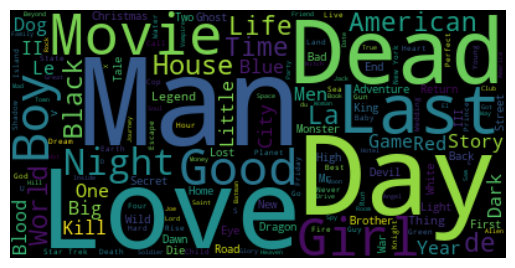

In [50]:
import matplotlib.pyplot as plt
plt.imshow(movie_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [52]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [53]:
from PIL import Image

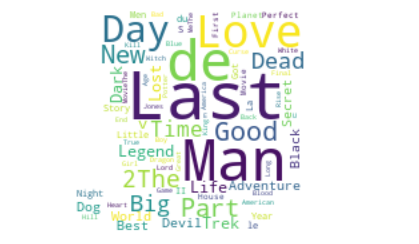

In [60]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the image
image_path = r"C:\Users\ROHAN\Pictures\Saved Pictures\ironman_mask.jpg"  # Replace "your_image.jpg" with the path to your image file
image = Image.open(image_path)

# Convert the image to grayscale
image_gray = image.convert("L")

# Convert the grayscale image to a numpy array
image_array = np.array(image_gray)

# Invert the colors (optional)
image_array = 255 - image_array

# Create a mask
mask = image_array.copy()
mask[mask < 255] = 0
mask[mask == 255] = 255
mask = mask.astype(np.uint8)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', mode='RGBA', mask=mask)

text = movie_names 
wordcloud.generate(text)

plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()





In [ ]:
image_path="C:\Users\ROHAN\Pictures\Saved Pictures\ironman_mask.jpg"


In [ ]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

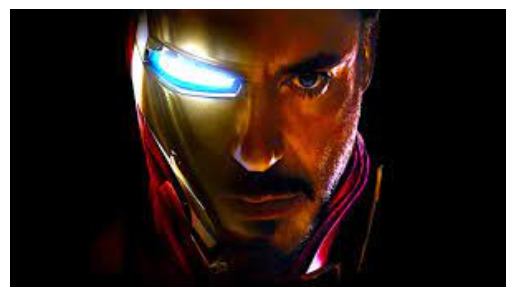

In [61]:
iron_mask_path=r"C:\Users\ROHAN\Pictures\Saved Pictures\ironman_mask.jpg"
iron_mask=plt.imread(iron_mask_path)
plt.imshow(iron_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-image (from versions: none)
ERROR: No matching distribution found for scikit-image


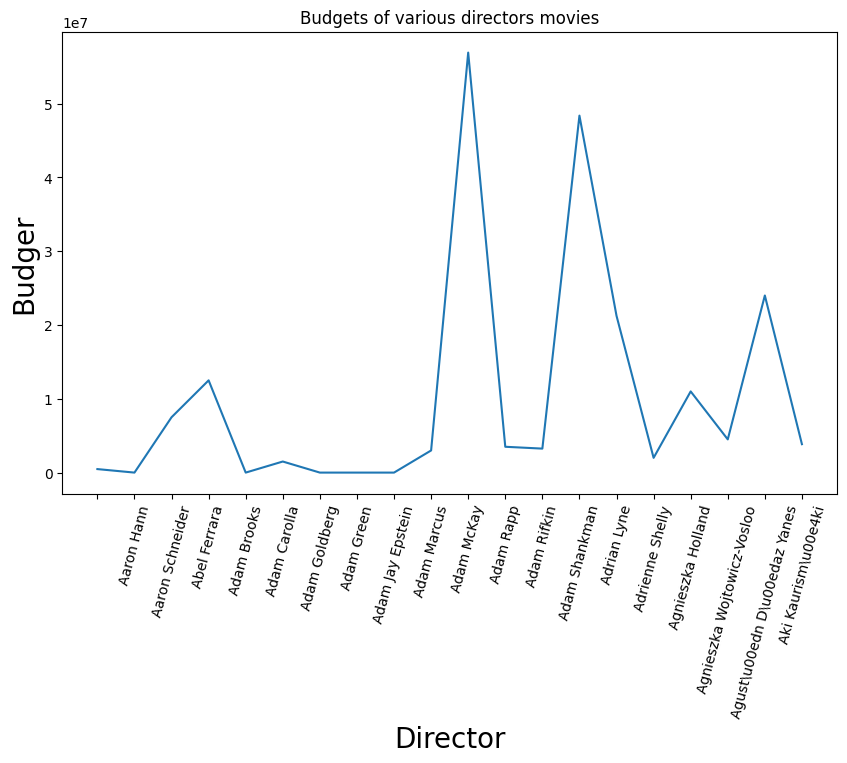

In [72]:
#Developing a line plot which shows how the budget is changes from one director to director
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_line=df.groupby('director')['budget'].mean()
plt.figure(figsize=(10,6))
top_20=df_line.head(20)
top_20.plot(kind='line')
directors=list(top_20.index)
plt.xticks(range(len(directors)), directors, rotation=75)
plt.xlabel('Director', fontsize=20)
plt.ylabel('Budger', fontsize=20)
plt.title("Budgets of various directors movies")
plt.show()

**creating a dashboard of directors movies**

In [73]:
directors_list=df['director'].tolist()
directors_list

['James Cameron',
 'Gore Verbinski',
 'Sam Mendes',
 'Christopher Nolan',
 'Andrew Stanton',
 'Sam Raimi',
 'Byron Howard',
 'Joss Whedon',
 'David Yates',
 'Zack Snyder',
 'Bryan Singer',
 'Marc Forster',
 'Gore Verbinski',
 'Gore Verbinski',
 'Zack Snyder',
 'Andrew Adamson',
 'Joss Whedon',
 'Rob Marshall',
 'Barry Sonnenfeld',
 'Peter Jackson',
 'Marc Webb',
 'Ridley Scott',
 'Peter Jackson',
 'Chris Weitz',
 'Peter Jackson',
 'James Cameron',
 'Anthony Russo',
 'Peter Berg',
 'Colin Trevorrow',
 'Sam Mendes',
 'Sam Raimi',
 'Shane Black',
 'Tim Burton',
 'Brett Ratner',
 'Dan Scanlon',
 'Michael Bay',
 'Michael Bay',
 'Sam Raimi',
 'Marc Webb',
 'Joseph Kosinski',
 'John Lasseter',
 'Martin Campbell',
 'Lee Unkrich',
 'McG',
 'James Wan',
 'Marc Forster',
 'Bryan Singer',
 'J.J. Abrams',
 'Bryan Singer',
 'Baz Luhrmann',
 'Mike Newell',
 'Guillermo del Toro',
 'Michael Bay',
 'Steven Spielberg',
 'Peter Sohn',
 'Brenda Chapman',
 'Justin Lin',
 'Andrew Stanton',
 'Brett Ratner',
 

In [83]:
directors_list=df['director'].tolist()
app=dash.Dash(__name__)
app.layout=html.Div(children=[html.H1("Movie budget distribution dashboard"),
                            dcc.Input(id='input_director', type='text', value='', placeholder='Enter a director name'),
                            html.Br(),
                             
                            html.Div(dcc.Graph(id='ouput-pie-chart'))
                           ])

@app.callback(Output(component_id='output-pie-chart', component_property='figure'),
              Input(component_id='input_director', component_property='value'))

def director(entered_name):
    filtered_df=df
    find_sim_director=difflib.get_close_matches(entered_name,directors_list)
    director_data=df[df['director']==find_sim_director]
    fig=px.pie(director_data, values=df['budget'], names=df['original_title'], title=f"Budget Distribuion of {entered_name} Movies")
    return fig

if __name__=='__main__':
    app.run_server()

In [84]:
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Movie budget distribution dashboard"),
    dcc.Input(id='input_director', type='text', value='', placeholder='Enter a director name'),
    html.Br(),
    html.Div(dcc.Graph(id='output-pie-chart'))
])

# Define the callback to update the pie chart based on user input
@app.callback(Output('output-pie-chart', 'figure'),
              [Input('input_director', 'value')])
def director(entered_name):
    if entered_name:
        find_sim_director = difflib.get_close_matches(entered_name, directors_list)
        if find_sim_director:
            director_data = df[df['director'] == find_sim_director[0]]
            fig = px.pie(director_data, values='budget', names='original_title',
                         title=f"Budget Distribution of {find_sim_director[0]} Movies")
            return fig
        else:
            return px.pie(title="No Data", names=[], values=[])
    else:
        return px.pie(title="Enter a director name", names=[], values=[])

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
NameError: name 'px' is not defined
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
NameError: name 'px' is not defined

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
NameError: name 'px' is not defined


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
NameError: name 'px' is not defined

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
NameError: name 'px' is not defined

-------------------------------------------------------

[2024-02-11 16:49:42,531] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 870, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 855, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\dash\dash.py", line 1310, in dispatch
    ctx.run(
  File "C:\Users\ROHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\dash\_callback.py", line 442, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invoked %%
                   ^^^^^^^^^^^^^^^^^^^

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File ~\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py:870, in Flask.full_dispatch_request(self=<Flask '__main__'>)
    869     if rv is None:
--> 870         rv = self.dispatch_request()
        self = <Flask '__main__'>
        rv = None
    871 except Exception as e:

File ~\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py:855, in Flask.dispatch_request(self=<Flask '__main__'>)
    854 view_args: dict[str, t.Any] = req.view_args  # type: ignore[assignment]
--> 855 return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
        rule = <Rule '/_dash-update-component' (POST, OPTIONS) -> /_dash-update-component>
        view_args = {}
        self.view_functions[rule.endpoint] = <bound method Dash.dispatch of <dash.dash.Dash object at 0x000002C80